In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
PATH = os.path.abspath(os.path.join('./', 'train'))
T_BGND = os.path.join(PATH, "noplastic")
T_FGND = os.path.join(PATH, "plastic")

PATH = os.path.abspath(os.path.join('./', 'validation'))
V_BGND = os.path.join(PATH, "noplastic")
V_FGND = os.path.join(PATH, "plastic")

bimages = glob(os.path.join(V_BGND, "*.jpg"))
bimages.extend(glob(os.path.join(T_BGND, "*.jpg")))

fimages = glob(os.path.join(T_FGND, "*.jpg"))
fimages.extend(glob(os.path.join(V_FGND, "*.jpg")))

labels = np.concatenate((np.zeros(len(bimages)),np.ones(len(fimages))),axis=None)

In [3]:
print("Fore:",len(fimages)," - ","Back:",len(bimages))

Fore: 5379  -  Back: 3838


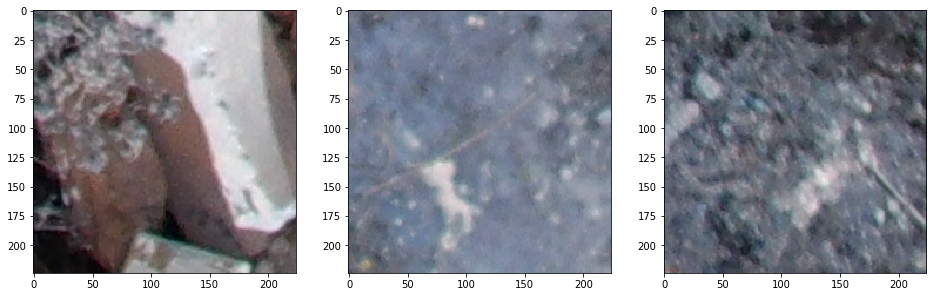

In [4]:
r = random.sample(bimages, 3)
r

# Matplotlib black magic
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]));    



In [5]:
img_p=cv2.imread(r[2])


In [6]:
img_p.shape

(224, 224, 3)

 [num_classes, num_samples, im_height, im_width, im_channels]

In [13]:
def fore_images():
    x = [] # images as arrays
    for img in fimages:
        base = os.path.basename(img)
        x.append(cv2.imread(img))
    return x

def back_images():
    x = [] # images as arrays
    for img in bimages:
        base = os.path.basename(img)
        x.append(cv2.imread(img))
    return x


fore = np.array(fore_images())[np.newaxis]
back = np.array(back_images())[np.newaxis]

In [18]:
print("Foreground:", fore.shape[1])
print("Background:", back.shape[1])
minimal = min(fore.shape[1] , back.shape[1])
print(minimal)

Foreground: 5379
Background: 3838
3838


In [22]:
npall = np.concatenate((fore[:,:minimal,:,:,:],back[:,:minimal,:,:,:]),axis=0)

In [24]:
np.save("dataset.npy", npall)

In [23]:
npall.shape

(2, 3838, 224, 224, 3)

In [25]:
int(3835*0.6)

2301